In [1]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import gc
import pickle
import matplotlib.pyplot as plt
from __future__ import print_function
mpl.rcParams['figure.figsize'] = (18, 6)

#import numpy as np


In [2]:
%%time

# get image at https://ganbreeder.app/i?k=ae23dc7e63526323dde46200  where key is index
# direct from aws https://s3.amazonaws.com/ganbreederpublic/imgs/ae23dc7e63526323dde46200.jpeg

#gb = pd.read_table('C:/foote/bitb/ganbreeder/export_images.txt',  header=0, skiprows=23, sep='\t')
gp = pd.read_table('/home/jtf/gith/ganalysis/unclean/export_images.txt',  header=0, skiprows=23, sep='\t')

CPU times: user 57.3 s, sys: 2.6 s, total: 59.9 s
Wall time: 1min 5s


In [4]:
%%time
# give arrays reasonable names so we can get at them later (right now named with first row data)
labels = ['id', 'key', 'parent1', 'parent2', 'creator', 'creation_type', 'liked', 'vector', 'label', 'truncation']
for i, label in enumerate(labels):
    gc.collect()
    gp.rename(columns={ gp.columns[i]: label },inplace=True)
display(gp.head(n=5))


,id,key,parent1,parent2,creator,creation_type,liked,vector,label,truncation
0,18531515,25c9a965c3e6222b1527ec31,18531402,\N,1590,\N,0,"{0.218553458327344963,-0.100470823187122485,-0...","{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",0.520163
1,18531516,50904a236e98d71036e9dabc,18531402,\N,1590,\N,0,"{0.0497139209960815801,0.231948704304708236,0....","{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",0.604127
2,18531517,da3f4d654c3620392e37f847,18531402,\N,1590,\N,0,"{0.193376900964014775,0.267763811403666674,0.2...","{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",0.441678
3,18531518,e219b09da129157d62e1a331,18531402,\N,1590,\N,0,"{0.0660950443520152281,0.51828771328422607,0.2...","{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",0.520163
4,18531524,ae23dc7e63526323dde46200,18531402,\N,1590,\N,0,"{0.034810225680454665,0.518954702096612541,-0....","{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",0.520163


CPU times: user 1.17 s, sys: 280 ms, total: 1.45 s
Wall time: 1.5 s


In [ ]:
%%time
# this doesn't work on my python :(
#gb.to_hdf('ganimages.hdf','gan')

In [5]:
%%time
#save to pickle so we can restart from here
gp.to_pickle('unclean/ganimages.pkl')

CPU times: user 5.03 s, sys: 4.57 s, total: 9.6 s
Wall time: 25.5 s


## Checkpoint 
-- restart from here if memory is low

In [6]:
%%time
gp = pd.read_pickle('unclean/ganimages.pkl')

CPU times: user 3.16 s, sys: 2.25 s, total: 5.41 s
Wall time: 5.75 s


In [7]:

display(gp.head(n=5))

,id,key,parent1,parent2,creator,creation_type,liked,vector,label,truncation
0,18531515,25c9a965c3e6222b1527ec31,18531402,\N,1590,\N,0,"{0.218553458327344963,-0.100470823187122485,-0...","{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",0.520163
1,18531516,50904a236e98d71036e9dabc,18531402,\N,1590,\N,0,"{0.0497139209960815801,0.231948704304708236,0....","{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",0.604127
2,18531517,da3f4d654c3620392e37f847,18531402,\N,1590,\N,0,"{0.193376900964014775,0.267763811403666674,0.2...","{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",0.441678
3,18531518,e219b09da129157d62e1a331,18531402,\N,1590,\N,0,"{0.0660950443520152281,0.51828771328422607,0.2...","{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",0.520163
4,18531524,ae23dc7e63526323dde46200,18531402,\N,1590,\N,0,"{0.034810225680454665,0.518954702096612541,-0....","{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",0.520163


# Convert and save vectors and labels
Vectors are 120-dim (mostly!) and labels are 1000-dim class membership

In [8]:
%%time

print(gp.index)
    
#l= gb.loc['creator']

vectors = []
for v in gp['vector'].values:
    v = v.translate(None, "{}")
    try:
        # convert from string to list of floats
        vectors.append([float(f)  for f in v.split(',')])
    except ValueError:
        print("error at line: " + str(v))



RangeIndex(start=0, stop=937907, step=1)
CPU times: user 1min 23s, sys: 928 ms, total: 1min 24s
Wall time: 1min 23s


In [9]:
vectors = np.array(vectors)
print(vectors.shape)
# vectors is not 2-D (still an array of lists) because some rows are different size (120 & 140). Fix
# in cleanup later)


(937907,)


In [10]:
%%time
# make an "unclean" directory and save so we can restart without having to do this rigamarole again

np.save("unclean/vectors.npy",vectors)

CPU times: user 16.8 s, sys: 756 ms, total: 17.5 s
Wall time: 18.2 s


In [11]:
# uncomment and run to claw back some memory

#del labels
del vectors
gc.collect()

0

In [12]:
%%time

print(gp.index)

labels = []
for v in gp['label'].values:
    v = v.translate(None, "{}")
    try:
        # convert from string to list of floats
        labels.append([float(f)  for f in v.split(',')])
    except ValueError:
        print("error at line: " + str(v))
        # error parsing, set to all 1s so we can filter it out later
        labels.append([1.]*1000)


RangeIndex(start=0, stop=937907, step=1)
error at line: 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0507244112143118986,0,0,0,0,0,0,0,0,0,0.0563796771334483388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0166508409052849513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0268991751309046803,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [13]:
labels = np.array(labels)
print(labels.shape)


(937907, 1000)


In [14]:

%%time
# make an "unclean" directory and save so we can restart without having to do this rigamarole again

np.save("unclean/labels.npy",labels)


#Probabaly want to restart kernel here because memory!

CPU times: user 356 ms, sys: 8.98 s, total: 9.33 s
Wall time: 2min 28s


In [15]:
# uncomment and run to claw back some memory

del labels
#del vectors
gc.collect()


0

# Convert and save labels and likes

In [16]:
%%time


# these are strings --but sometimes things want to interpret as hex ints so make them byte arrays?     

keys = []
for k in gp['key'].values:
    keys.append(bytearray(k))


CPU times: user 552 ms, sys: 140 ms, total: 692 ms
Wall time: 3.04 s


In [17]:
%%time

with open('unclean/keys.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(keys, f, pickle.HIGHEST_PROTOCOL)


CPU times: user 25.5 s, sys: 412 ms, total: 25.9 s
Wall time: 31.4 s


In [28]:
%%time

likes = []
for l in gp['liked'].values:
    try:
        likes.append(int(l))
    except ValueError:
        print("error at line: " + str(l))
        likes.append(0)

CPU times: user 440 ms, sys: 0 ns, total: 440 ms
Wall time: 517 ms


In [19]:
%%time

ids = []
for l in gp['id'].values:
    try:
        ids.append(int(l))
    except ValueError:
        ids.append(0)


CPU times: user 480 ms, sys: 4 ms, total: 484 ms
Wall time: 609 ms


In [34]:
%%time

trunc = []
for l in gp['truncation'].values:
    try:
        trunc.append(float(l))
    except ValueError:
        print(str(l))
        trunc.append(0.)
np.save('unclean/truncation.npy',np.array(trunc))

CPU times: user 408 ms, sys: 4 ms, total: 412 ms
Wall time: 414 ms


In [20]:
%%time
# assuming uint64 is big enough, right?
ids = np.array(ids,dtype='uint64')


CPU times: user 124 ms, sys: 8 ms, total: 132 ms
Wall time: 197 ms


In [23]:
%%time
np.save('unclean/ids.npy',ids)

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 9.23 ms


In [25]:
%%time


parent1 = []
for l in gp['parent1'].values:
    try:
        parent1.append(int(l))
    except ValueError:
        parent1.append(0)

parent2 = []
for l in gp['parent2'].values:
    try:
        parent2.append(int(l))
    except ValueError:
        parent2.append(0)

        
parent1 = np.array(parent1)
print(parent1.shape)
parent1 = np.array(parent2)
print(parent2.shape)

(937907,)
CPU times: user 2.72 s, sys: 44 ms, total: 2.76 s
Wall time: 2.84 s


In [42]:

np.save('unclean/parent1.npy',np.array(parent1))
np.save('unclean/parent2.npy',np.array(parent2))

# reload uncleaned data
Restart from here without having to redo above

In [2]:
%%time
gc.collect()
uvectors = np.load('unclean/vectors.npy')

CPU times: user 29.3 s, sys: 2.07 s, total: 31.4 s
Wall time: 31.7 s


In [3]:
%%time
gc.collect()
uclasses = np.load('unclean/classes.npy')

CPU times: user 2.24 s, sys: 4.01 s, total: 6.24 s
Wall time: 17.6 s


In [4]:
%%time
gc.collect()
ulikes = np.load('unclean/likes.npy')

CPU times: user 1.74 s, sys: 0 ns, total: 1.74 s
Wall time: 1.78 s


In [5]:
%%time
gc.collect()
utrunc = np.load('unclean/truncation.npy')

CPU times: user 1.74 s, sys: 12 ms, total: 1.76 s
Wall time: 1.79 s


In [6]:
%%time 
import pickle
with open('unclean/keys.pkl', 'rb') as f:
    ukeys = pickle.load(f)

CPU times: user 9.7 s, sys: 268 ms, total: 9.97 s
Wall time: 10 s


In [7]:
%%time
uparent1 = np.load('unclean/parent1.npy')
uparent2 = np.load('unclean/parent2.npy')
uids = np.load('unclean/ids.npy')

CPU times: user 0 ns, sys: 12 ms, total: 12 ms
Wall time: 63.7 ms


In [8]:
# sanity check: did we miss any rows? All arrays should have same first dimension

udata = [uids, uparent1, uparent2, uvectors, ulikes,  utrunc]
#udata = [uids, uparent1, uparent2, uvectors, uclasses, utrunc]

for d in udata:
    print(d.shape)
print(len(ukeys))


(937907,)
(937907,)
(937907,)
(937907,)
(937907,)
(937907,)
937907


# Data cleanup -- remove bad table entries

1993
27259


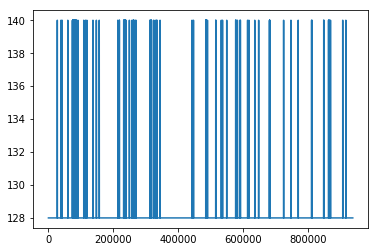

In [9]:
#First take a look at vector lengths, there are some dodgy ones
 

lengths = np.array([len(v) for v in uvectors])

longones = np.where(lengths==140)
plt.plot(lengths)


print(len(longones[0]))
print(longones[0][0])
#print(goodi.shape)
#print(uvectors.shape)
#vvectors = np.array(uvectors)

In [10]:
# first round of cleaning:
# extract good data (where vectors = 128)

dnames = ['uids', 'uparent1', 'uparent2', 'uvectors', 'uclasses', 'ulikes', 'utrunc']


lengths = np.array([len(v) for v in uvectors[0:-1]])
# find good indexes where the vector length is 128, some problem with last one 
goodi = np.where(lengths==128)
#goodi = goodi[0]

# kind of hacky here, do this "in place" using exec so we can avoid temp variables
for d in dnames:
    execstr = "{0} = {0}[goodi]".format(d)
    print(execstr)
    exec(execstr)

# now that uvectors has uniform number of rows, make it into an array
uvectors = np.array(uvectors)

for d in dnames:
    execstr = "print({0}.shape)".format(d)
    print(execstr)
    exec(execstr)

# keys are a list of strings so cant use numpy operations

ukeys = [ukeys[int(i)] for i in goodi[0]]
print(len(ukeys))




uids = uids[goodi]
uparent1 = uparent1[goodi]
uparent2 = uparent2[goodi]
uvectors = uvectors[goodi]
uclasses = uclasses[goodi]
ulikes = ulikes[goodi]
utrunc = utrunc[goodi]
print(uids.shape)
(935913,)
print(uparent1.shape)
(935913,)
print(uparent2.shape)
(935913,)
print(uvectors.shape)
(935913,)
print(uclasses.shape)
(935913, 1000)
print(ulikes.shape)
(935913,)
print(utrunc.shape)
(935913,)
935913


In [11]:
# claw back some memory
try:
    del vectors
    del classes
except NameError:
    pass
    
gc.collect()

2212

In [12]:
# second round of cleaning:
# class labels have nans, and values too large or small: get rid of those
goodc = []

for i, c in enumerate(uclasses):
    inans = np.argwhere(np.isnan(c))
    #print(inans)
    if len(inans) == 0:
        if (np.sum(c) <= 1.0) and (np.min(c) >= 0.0):
            goodc.append(i)

print(len(goodc))


765352


In [13]:
# first round of cleaning:
# extract good data (where classes don't have wierd values

# kind of hacky here, do this "in place" using exec so we can avoid temp variables
for d in dnames:
    execstr = "{0} = {0}[goodc]".format(d)
    print(execstr)
    exec(execstr)


for d in dnames:
    execstr = "print({0}.shape)".format(d)
    print(execstr)
    exec(execstr)

# keys are a list of strings so cant use numpy operations

ukeys = [ukeys[int(i)] for i in goodc]


uids = uids[goodc]
uparent1 = uparent1[goodc]
uparent2 = uparent2[goodc]
uvectors = uvectors[goodc]
uclasses = uclasses[goodc]
ulikes = ulikes[goodc]
utrunc = utrunc[goodc]
print(uids.shape)
(765352,)
print(uparent1.shape)
(765352,)
print(uparent2.shape)
(765352,)
print(uvectors.shape)
(765352,)
print(uclasses.shape)
(765352, 1000)
print(ulikes.shape)
(765352,)
print(utrunc.shape)
(765352,)


In [14]:
print(np.max(goodc))
print(np.min(goodc))

935912
0


In [21]:
# reshape vectors into actual shape
print(uvectors.shape)
n = len(uvectors)
m = len(uvectors[0])
uvectors = np.concatenate(uvectors).reshape((n,m))
print(uvectors.shape)

(765352,)
(765352, 128)


In [22]:
dnames = ['uids', 'uparent1', 'uparent2', 'uvectors', 'uclasses', 'ulikes', 'utrunc']

for d in dnames:
    execstr = "np.save('{0}.npy',{0})".format(d)
    print(execstr)
    exec(execstr)

with open('ukeys.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(ukeys, f, pickle.HIGHEST_PROTOCOL)

np.save('uvectors.npy',uvectors)


# Read cleaned data
Start here if data has been saved, and/or restart kernel to save memory

In [24]:
%%time


dnames = ['uids', 'uparent1', 'uparent2', 'uvectors', 'uclasses', 'ulikes', 'utrunc']


for d in dnames:
    execstr = "{0} = np.load('{0}.npy')".format(d)
    print(execstr)
    exec(execstr)
    execstr = "print({0}.shape)".format(d)
    print(execstr)
    exec(execstr)

import pickle
with open('ukeys.pkl', 'rb') as f:
    ukeys = pickle.load(f)

uids = np.load('uids.npy')
print(uids.shape)
(765352,)
uparent1 = np.load('uparent1.npy')
print(uparent1.shape)
(765352,)
uparent2 = np.load('uparent2.npy')
print(uparent2.shape)
(765352,)
uvectors = np.load('uvectors.npy')
print(uvectors.shape)
(765352, 128)
uclasses = np.load('uclasses.npy')
print(uclasses.shape)
(765352, 1000)
ulikes = np.load('ulikes.npy')
print(ulikes.shape)
(765352,)
utrunc = np.load('utrunc.npy')
print(utrunc.shape)
(765352,)
CPU times: user 10.9 s, sys: 4.85 s, total: 15.7 s
Wall time: 1min 20s
